<a href="https://colab.research.google.com/github/matchbou/Public/blob/master/titanic_kikagaku_20190320a03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 新しいセクション

In [0]:
!pwd

/content


In [0]:
%cd drive/My\ Drive/kaggle/titanic

/content/drive/My Drive/kaggle/titanic


In [0]:
%pwd

'/content/drive/My Drive/kaggle/titanic'

In [0]:
#matplotlibの日本語表示-
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [0]:
# コメントアウトをいったん外してシステム側のフォントファイルを切り替え操作する⇒ランタイム再起動⇒再度コメントアウトしてから流す
# !ls /root/.cache/matplotlib
# !rm /root/.cache/matplotlib/*.json #デフォルトのフォントを削除している
# !ls /root/.cache/matplotlib

In [0]:
# データ加工・処理用
import numpy as np
import pandas as pd
# データ可視化用
import seaborn as sns
import matplotlib.pyplot as plt
# モデル一覧
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
## matplotlibの日本語適用
import matplotlib
font = {'family' : 'IPAGothic'}
matplotlib.rc('font', **font)

In [0]:
%matplotlib inline

In [0]:
# データを読み込みつつ、DataFrame構造に変換
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')

In [0]:
# データの先頭の表示（デフォルトは5行）
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# データの先頭の表示（デフォルトは5行）
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
# .dataframe tbody tr th {
#  vertical-align: top;
# }
# .dataframe thead th {
#  text-align: right;
# }

In [0]:
df_train.shape

(891, 12)

In [0]:
df_test.shape

(418, 11)

In [0]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:

set(df_train.columns.values) & set(df_test.columns.values)  #共通部分取り出し
#set(df_train.columns.values) ^ set(df_test.columns.values)  #相違部分取り出し

{'Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Ticket'}

In [0]:
df_train.info() #欠損値状況---行数より少なければ欠損があるということ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
df_test.info() #テストデータもトレインデータも両方確認する

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
df_train.isnull().sum() #欠損値状況

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
# full = pd.concat([df_train, df_test], axis=0, ignore_index=True)
full = df_train.append(df_test, ignore_index=True)
full.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [0]:
full.shape

(1309, 12)

In [0]:
# .dataframe tbody tr th {
#  vertical-align: top;
# }
# .dataframe thead th {
#  text-align: right;
# }

In [0]:
full.describe() # 数値データ-値の域に注意
# full.describe(include='O') # 文字列データ（オブジェクト）

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [0]:
full.describe(include='O') # 文字列データ（オブジェクト）

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,914,2,843,11


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


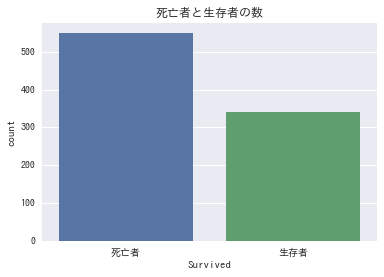

In [0]:
import warnings
# warnings.filterwarnings('ignore') #警告表示しないオプション設定
sns.countplot(x='Survived', data=df_train)
plt.title('死亡者と生存者の数')
plt.xticks([0, 1], ['死亡者', '生存者'])
plt.show()

In [0]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [0]:
df_train['Survived'].value_counts()/len(df_train['Survived'])

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [0]:
import matplotlib
matplotlib.get_cachedir()

'/root/.cache/matplotlib'

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


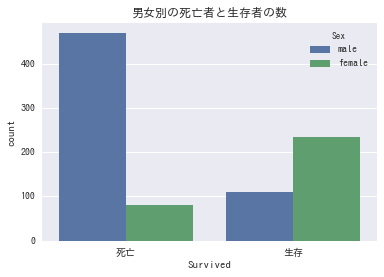

Survived    0    1
Sex               
female     81  233
male      468  109


Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


In [0]:
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.xticks([0.0, 1.0], ['死亡', '生存'])
plt.title('男女別の死亡者と生存者の数')
plt.show()
print(pd.crosstab(df_train['Sex'], df_train['Survived']))
print('\n')
print(pd.crosstab(df_train['Sex'], df_train['Survived'], normalize='index'))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


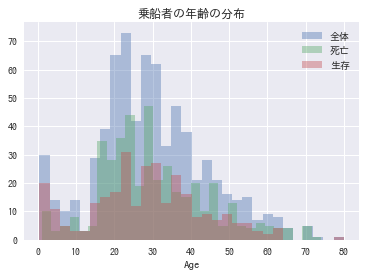

In [0]:
sns.distplot(df_train['Age'].dropna(), kde=False, bins=30)
sns.distplot(df_train[df_train['Survived'] == 0].Age.dropna(), kde=False, bins=30)
sns.distplot(df_train[df_train['Survived'] == 1].Age.dropna(), kde=False, bins=30)
plt.title('乗船者の年齢の分布')
plt.legend(['全体','死亡','生存'])
plt.show()

In [0]:
# 可視化のカスタマイズ
def plot_distribution(df , var , target , **kwargs):
  row = kwargs.get('row' , None)
  col = kwargs.get('col' , None)
  facet = sns.FacetGrid(df , hue=target , aspect=4 , row = row , col = col)
  facet.map(sns.kdeplot , var , shade= True)
  facet.set(xlim=(0 , df[ var ].max()))
  facet.add_legend()

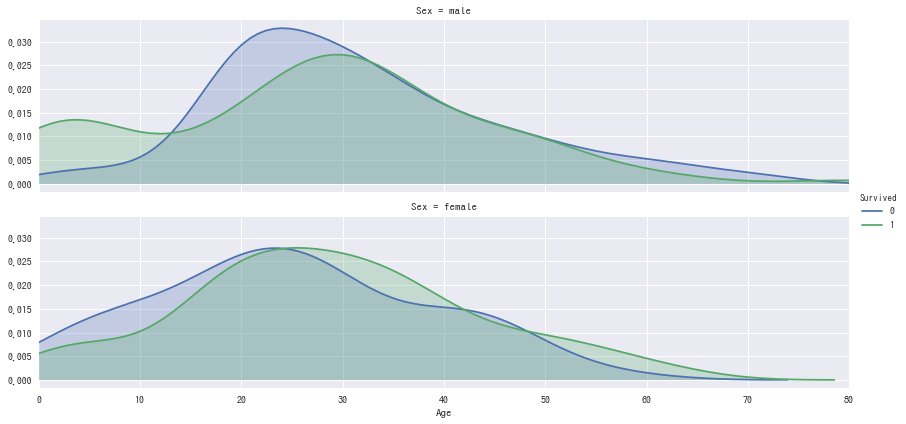

In [0]:
plot_distribution(df_train, var='Age', target='Survived', row='Sex')
# facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
# facet.map(sns.kdeplot,'Age',shade= True)
# facet.set(xlim=(0, df_train['Age'].max()))
# facet.add_legend()

In [0]:
# 年齢を８等分
df_train['CategoricalAge'] = pd.cut(df_train['Age'], 8)
# CategoricalAgeとSurvivedの関係性を見る
pd.crosstab(df_train['CategoricalAge'], df_train['Survived'])

Survived,0,1
CategoricalAge,,
"(0.34, 10.368]",26,38
"(10.368, 20.315]",71,44
"(20.315, 30.263]",146,84
"(30.263, 40.21]",86,69
"(40.21, 50.158]",53,33
"(50.158, 60.105]",25,17
"(60.105, 70.052]",13,4
"(70.052, 80.0]",4,1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


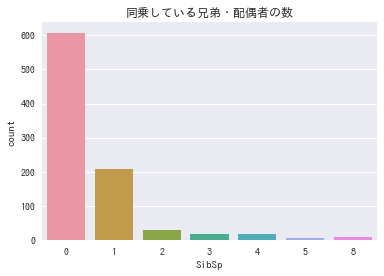

In [0]:
sns.countplot(x='SibSp', data=df_train)
plt.title('同乗している兄弟・配偶者の数')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


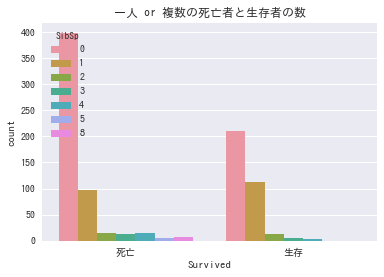

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [0]:
sns.countplot(x='Survived', hue='SibSp', data=df_train)
plt.xticks([0.0, 1.0], ['死亡', '生存'])
plt.title('一人 or 複数の死亡者と生存者の数')
plt.show()
pd.crosstab(df_train['SibSp'], df_train['Survived'])

In [0]:
pd.crosstab(df_train['SibSp'], df_train['Survived'], normalize='index')

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


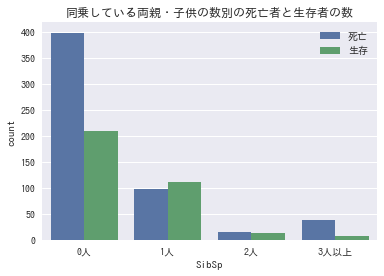

In [0]:
df_train['SibSp_shape'] = [i if i <=2 else 3 for i in df_train['SibSp']]
sns.countplot(x='SibSp_shape',hue='Survived', data = df_train)
plt.title('同乗している両親・子供の数別の死亡者と生存者の数')
plt.legend(['死亡','生存'])
plt.xticks([0, 1, 2, 3], ['0人', '1人', '2人', '3人以上'])
plt.xlabel('SibSp')
plt.show()

In [0]:
pd.crosstab(df_train['SibSp_shape'], df_train['Survived'])

Survived,0,1
SibSp_shape,,
0,398,210
1,97,112
2,15,13
3,39,7


In [0]:
pd.crosstab(df_train['Age'], df_train['Survived'])

Survived,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
1.00,2,5
2.00,7,3
3.00,1,5
4.00,3,7


In [0]:
full['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [0]:
# 敬称のみを取り出す
title = pd.DataFrame()
title['Title'] = full['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
title.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [0]:
df_train['Name'].map(lambda name: name.split(',')[1]).head()

0                                Mr. Owen Harris
1     Mrs. John Bradley (Florence Briggs Thayer)
2                                    Miss. Laina
3             Mrs. Jacques Heath (Lily May Peel)
4                              Mr. William Henry
Name: Name, dtype: object

In [0]:
df_train['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip()).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [0]:
# 敬称から社会的地位別に分ける
Title_Dictionary = {
 "Capt": "Officer",
 "Col": "Officer",
 "Major": "Officer",
 "Jonkheer": "Royalty",
 "Don": "Royalty",
 "Sir" : "Royalty",
 "Dr": "Officer",
 "Rev": "Officer",
 "the Countess":"Royalty",
 "Dona": "Royalty",
 "Mme": "Mrs",
 "Mlle": "Miss",
 "Ms": "Mrs",
 "Mr" : "Mr",
 "Mrs" : "Mrs",
 "Miss" : "Miss",
 "Master" : "Master",
 "Lady" : "Royalty"
}

In [0]:
title[ 'Title' ] = title.Title.map( Title_Dictionary )

In [0]:
# 変更できているか確認
title['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

In [0]:
title.head(10)

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [0]:
# nameとsurvivedの関係をみる
df_train['Title'] = title.Title
df_train.groupby("Title")["Survived"].mean()

Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.795276
Officer    0.277778
Royalty    0.600000
Name: Survived, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 1.0, '生存者と社会的地位の関係')

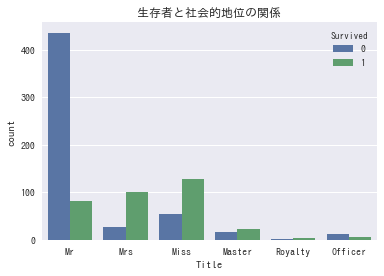

In [0]:
# nameとsurvivedの関係を可視化
sns.countplot(x='Title',hue='Survived', data=df_train)
plt.title('生存者と社会的地位の関係')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


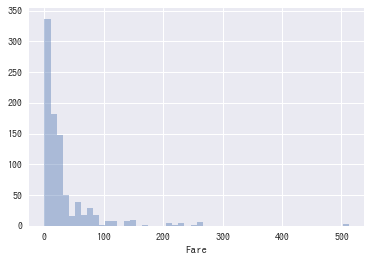

In [0]:
sns.distplot(df_train['Fare'].dropna(), kde=False, hist=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


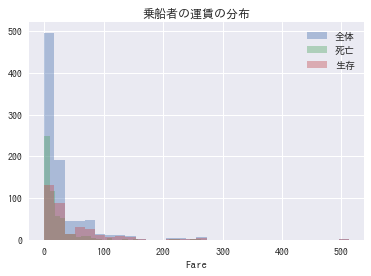

In [0]:
# plt.figure(figsize=(14, 8))
sns.distplot(df_train['Fare'].dropna(), kde=False, bins=30)
sns.distplot(df_train[df_train['Survived'] == 0].Fare.dropna(), kde=False, bins=30)
sns.distplot(df_train[df_train['Survived'] == 1].Fare.dropna(), kde=False, bins=30)
# sns.distplot(df_train[df_train['Survived'] == 1].Fare.dropna(), kde=False, bins=30, color='red')
plt.title('乗船者の運賃の分布')
plt.legend(['全体','死亡','生存'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


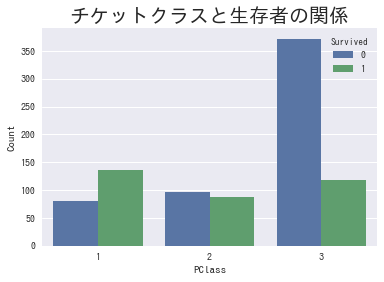

In [0]:
sns.countplot(x="Pclass", hue='Survived', data=df_train)
plt.xlabel('PClass')
plt.ylabel('Count')
plt.title('チケットクラスと生存者の関係', fontsize=20)
plt.show()

In [0]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

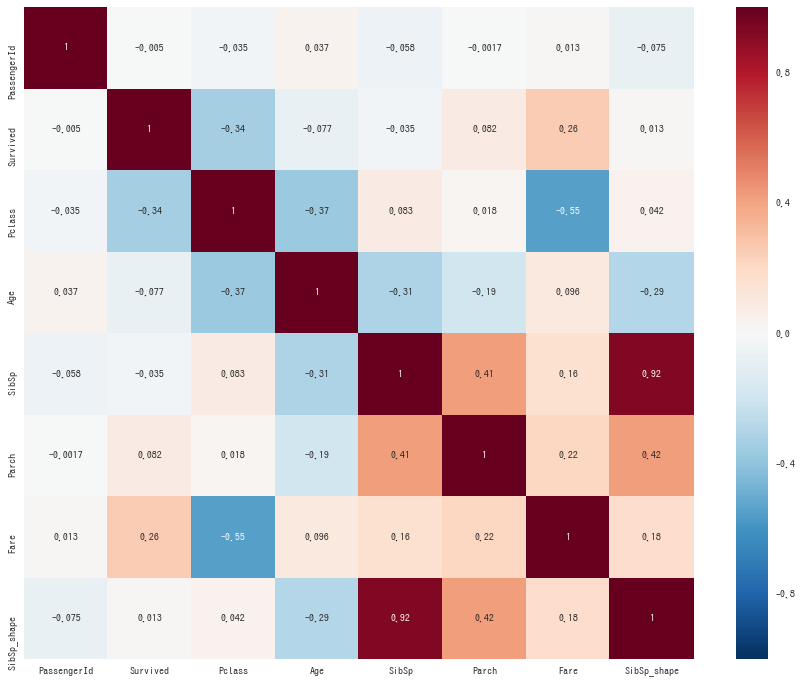

In [0]:
#データサイエンティストの世界では相関係数 0.7-0.9位が使える値（それ以下はNG、それ以上はオーバーフィットを疑う）
plt.figure(figsize=(15,12))
sns.heatmap(df_train.corr(),vmax=1.0, annot=True)
plt.show()

In [0]:
#ダミー変数化
title= pd.get_dummies(title.Title)
title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [0]:
embarked = pd.get_dummies( full.Embarked , prefix='Embarked' )
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [0]:
pclass = pd.get_dummies( full.Pclass , prefix='Pclass' )
pclass.head()


,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [0]:
# カテゴリ変数化
sex = pd.Series( np.where( full.Sex == 'male' , 1 , 0 ) , name = 'Sex' )
sex

0       1
1       0
2       0
3       0
4       1
5       1
6       1
7       1
8       0
9       0
10      0
11      0
12      1
13      1
14      0
15      0
16      1
17      1
18      0
19      0
20      1
21      1
22      0
23      1
24      0
25      0
26      1
27      1
28      0
29      1
       ..
1279    1
1280    1
1281    1
1282    0
1283    1
1284    1
1285    1
1286    0
1287    1
1288    0
1289    1
1290    1
1291    0
1292    1
1293    0
1294    1
1295    1
1296    1
1297    1
1298    1
1299    0
1300    0
1301    0
1302    0
1303    0
1304    1
1305    0
1306    1
1307    1
1308    1
Name: Sex, Length: 1309, dtype: int64

In [0]:
# 欠損値の補完---ヒストグラムで山が複数ある場合は平均値に変えて中央値とすべき。
# データセット作成
imputed = pd.DataFrame()
# 平均で埋める
imputed[ 'Age' ] = full.Age.fillna( full.Age.mean() )
# 平均で埋める
imputed[ 'Fare' ] = full.Fare.fillna( full.Fare.mean() )
imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [0]:
full['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [0]:
cabin = pd.DataFrame()
# U = Uknown
cabin['Cabin'] = full.Cabin.fillna('U')
# イニシャル文字で統一
cabin[ 'Cabin' ] = cabin[ 'Cabin' ].map( lambda c : c[0] )
# ダミー変数化
cabin = pd.get_dummies( cabin['Cabin'] , prefix = 'Cabin' )
cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [0]:
cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [0]:
family = pd.DataFrame()
# 家族人数
family[ 'FamilySize' ] = full[ 'Parch' ] + full[ 'SibSp' ] + 1
# 構成人数毎に組み分け
family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ] = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ] = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )
family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [0]:
# 特徴量の選択
full_X = pd.concat( [ imputed , embarked , cabin , sex ] , axis=1 ) #ここで説明変数を取捨選択している
full_X.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Sex
0,22.0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,1
1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0
2,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,0
3,35.0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,0
4,35.0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,1


In [0]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [0]:
# データセット作成-上で訓練用とテスト用を結合しているので分割する。訓練用は更に学習用と確認用に分割する。
from sklearn.model_selection import train_test_split
train_valid_X = full_X[ 0:891 ]
train_valid_y = full[:891].Survived
test_X = full_X[ 891: ]
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )
print (full_X.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape)

(1309, 15) (623, 15) (268, 15) (623,) (268,) (418, 15)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
# 特徴量の重要度を計測する（feature importance）
tree = DecisionTreeClassifier( random_state=0 )
tree.fit( train_X, train_y)
fti = tree.feature_importances_
for i, imp in enumerate(train_X.columns):
  print('\t{0:20s} : {1:>.6f}'.format(imp, fti[i]))
# imp = pd.DataFrame(
# tree.feature_importances_ ,
# columns = [ 'Importance' ] ,
# index = train_X.columns
# )
# imp = imp.sort_values( [ 'Importance' ] , ascending = True )
# imp[ : 10 ].plot(kind = 'barh')
# print (tree.score( train_X, train_y ))

	Age                  : 0.274380
	Fare                 : 0.298389
	Embarked_C           : 0.033237
	Embarked_Q           : 0.016462
	Embarked_S           : 0.008987
	Cabin_A              : 0.000000
	Cabin_B              : 0.009588
	Cabin_C              : 0.004609
	Cabin_D              : 0.006826
	Cabin_E              : 0.013251
	Cabin_F              : 0.000000
	Cabin_G              : 0.006375
	Cabin_T              : 0.000000
	Cabin_U              : 0.037781
	Sex                  : 0.290115


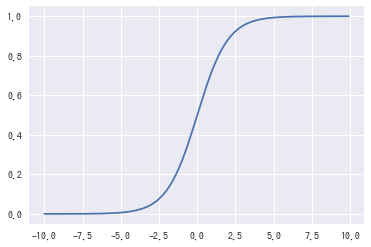

In [0]:
import math
x = np.arange(-10, 10, 0.1)
e = math.e
y = 1 / (1 + e**-x)
plt.plot(x, y)
plt.show()

In [0]:
model = LogisticRegression()
model.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
 intercept_scaling=1, max_iter=100, multi_class='warn',
 n_jobs=None, penalty='l2', random_state=None, solver='warn',
 tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
print(model.score(train_X, train_y))
print(model.score(valid_X, valid_y))

0.7865168539325843
0.7985074626865671


In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [0]:
rfecv = RFECV( estimator=model , step=1 , cv=StratifiedKFold(2 ), scoring='accuracy' )
rfecv.fit( train_X , train_y )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [0]:
RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
 estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
 intercept_scaling=1, max_iter=100, multi_class='warn',
 n_jobs=None, penalty='l2', random_state=None, solver='warn',
 tol=0.0001, verbose=0, warm_start=False),
 min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
 verbose=0)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

0.7768860353130016 0.8097014925373134
最適な特徴量の数 : 1
[False False False False False False False False False False False False
 False False  True]


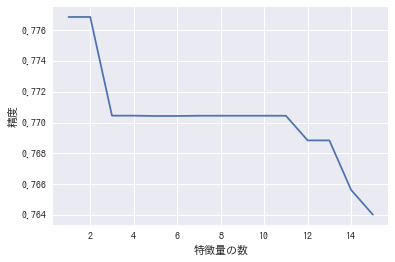

In [0]:
print (rfecv.score( train_X , train_y ) , rfecv.score( valid_X , valid_y ))
print( "最適な特徴量の数 : %d" % rfecv.n_features_ )
print(rfecv.support_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel( "特徴量の数" )
plt.ylabel( "精度" )
plt.plot( range( 1 , len( rfecv.grid_scores_ ) + 1 ) , rfecv.grid_scores_ )
plt.show()

In [0]:
pred = model.predict( test_X )
pred= pred.astype(int)
passenger_id = full[891:].PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': pred } )
test.shape

(418, 2)

In [0]:
test.head()


,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1


In [0]:
test.to_csv( 'submission_mac8c8x.csv' , index = False )

In [0]:
from google.colab import files
files.download('submission_mac8c8x.csv')

In [0]:
model = RandomForestClassifier()

In [0]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)